In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="whitegrid", palette="colorblind")

In [48]:
seeds = [0, 1, 2, 3, 4, 5]

In [49]:
data_train_t = np.zeros((len(seeds), 2750))
data_train_y = np.zeros((len(seeds), 2750))
data_outliers = np.zeros((len(seeds), 10))
results_m_intel = np.zeros((len(seeds), 2750))
results_m_lintel = np.zeros((len(seeds), 2750))
results_s_intel = np.zeros((len(seeds), 2750))
results_s_lintel = np.zeros((len(seeds), 2750))
results_t_intel = np.zeros((len(seeds),))
results_t_lintel = np.zeros((len(seeds),))
results_pll_intel = np.zeros((len(seeds),))
results_pll_lintel = np.zeros((len(seeds),))
results_nmse_intel = np.zeros((len(seeds),))
results_nmse_lintel = np.zeros(
    (len(seeds)),
)

for seed in seeds:
    data = np.load(f"results/experiment_1_seed_{seed}_geom_True_data.npz")
    train_t = data["train_t"].squeeze()
    pretrain_t = data["pretrain_t"].squeeze()
    train_y = data["train_y"]
    pretrain_y = data["pretrain_y"]
    true_outliers = data["true_outliers"]

    data_train_t[seed, :] = train_t
    data_train_y[seed, :] = train_y
    data_outliers[seed, :] = true_outliers

    res_lintel = np.load(
        f"results/experiment_1_seed_{seed}_geom_True_lintel_results.npz"
    )
    m_lintel = res_lintel["ms"]
    s_lintel = res_lintel["ss"]
    o_lintel = res_lintel["ots"]
    w_lintel = res_lintel["ws"]
    t_lintel = res_lintel["t_lintel"]

    res_intel = np.load(
        f"results/experiment_1_seed_{seed}_geom_True_intel_results.npz")
    m_intel = res_intel["ms"]
    s_intel = res_intel["ss"]
    o_intel = res_intel["ots"]
    w_intel = res_intel["ws"]
    t_intel = res_intel["t_intel"]

    results_m_lintel[seed, :] = m_lintel
    results_s_lintel[seed, :] = s_lintel
    results_m_intel[seed, :] = m_intel
    results_s_intel[seed, :] = s_intel
    results_t_lintel[seed] = t_lintel
    results_t_intel[seed] = t_intel

    intel_pll = stats.norm.logpdf(train_y, m_intel, np.sqrt(s_intel))
    lintel_pll = stats.norm.logpdf(train_y, m_lintel, np.sqrt(s_lintel))
    results_pll_intel[seed] = np.delete(intel_pll, true_outliers).mean()
    results_pll_lintel[seed] = np.delete(lintel_pll, true_outliers).mean()

    intel_nmse = (train_y - m_intel) ** 2 / np.var(train_y)
    lintel_nmse = (train_y - m_lintel) ** 2 / np.var(train_y)
    results_nmse_intel[seed] = np.delete(intel_nmse, true_outliers).mean()
    results_nmse_lintel[seed] = np.delete(lintel_nmse, true_outliers).mean()

In [50]:
np.mean(results_pll_intel), np.std(results_pll_intel), np.mean(
    results_pll_lintel
), np.std(results_pll_lintel)

(-0.3898168151806886,
 0.057776484200038614,
 -0.37647064882235176,
 0.045274798649530705)

In [51]:
stats.wilcoxon(results_pll_intel, results_pll_lintel, alternative="less")

WilcoxonResult(statistic=0.0, pvalue=0.015625)

In [52]:
np.mean(results_nmse_intel), np.std(results_nmse_intel), np.mean(
    results_nmse_lintel
), np.std(results_nmse_lintel)

(0.060608297610580515,
 0.014440977302864944,
 0.05908962574647587,
 0.013364541018172237)

In [53]:
stats.wilcoxon(results_nmse_intel, results_nmse_lintel, alternative="greater")

WilcoxonResult(statistic=21.0, pvalue=0.015625)

In [54]:
np.mean(results_t_intel), np.std(results_t_intel), np.mean(results_t_lintel), np.std(
    results_t_lintel
)

(32.288206815719604,
 0.2756585705230885,
 5.091426173845927,
 0.05790491998303018)

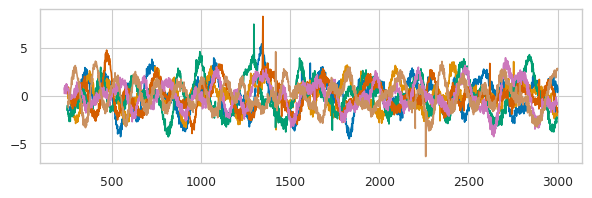

In [55]:
fig, ax1 = plt.subplots(figsize=(7, 2))
ax1.plot(data_train_t.T, data_train_y.T)
plt.savefig(
    "plots/experiment_1_functions.png", dpi=600, transparent=False, bbox_inches="tight"
)

In [56]:
data_train_t = np.zeros((len(seeds), 2750))
data_train_y = np.zeros((len(seeds), 2750))
data_outliers = np.zeros((len(seeds), 10))
results_aa_m_intel = np.zeros((len(seeds), 2750))
results_aa_m_lintel = np.zeros((len(seeds), 2750))
results_aa_s_intel = np.zeros((len(seeds), 2750))
results_aa_s_lintel = np.zeros((len(seeds), 2750))
results_aa_t_intel = np.zeros((len(seeds),))
results_aa_t_lintel = np.zeros((len(seeds),))
results_aa_pll_intel = np.zeros((len(seeds),))
results_aa_pll_lintel = np.zeros((len(seeds),))
results_aa_nmse_intel = np.zeros((len(seeds),))
results_aa_nmse_lintel = np.zeros(
    (len(seeds)),
)

for seed in seeds:
    data = np.load(f"results/experiment_1_seed_{seed}_geom_False_data.npz")
    train_t = data["train_t"].squeeze()
    pretrain_t = data["pretrain_t"].squeeze()
    train_y = data["train_y"]
    pretrain_y = data["pretrain_y"]
    true_outliers = data["true_outliers"]

    data_train_t[seed, :] = train_t
    data_train_y[seed, :] = train_y
    data_outliers[seed, :] = true_outliers

    res_lintel = np.load(
        f"results/experiment_1_seed_{seed}_geom_False_lintel_results.npz"
    )
    m_lintel = res_lintel["ms"]
    s_lintel = res_lintel["ss"]
    o_lintel = res_lintel["ots"]
    w_lintel = res_lintel["ws"]
    t_lintel = res_lintel["t_lintel"]

    res_intel = np.load(
        f"results/experiment_1_seed_{seed}_geom_False_intel_results.npz"
    )
    m_intel = res_intel["ms"]
    s_intel = res_intel["ss"]
    o_intel = res_intel["ots"]
    w_intel = res_intel["ws"]
    t_intel = res_intel["t_intel"]

    results_aa_m_lintel[seed, :] = m_lintel
    results_aa_s_lintel[seed, :] = s_lintel
    results_aa_m_intel[seed, :] = m_intel
    results_aa_s_intel[seed, :] = s_intel
    results_aa_t_lintel[seed] = t_lintel
    results_aa_t_intel[seed] = t_intel

    intel_pll = stats.norm.logpdf(train_y, m_intel, np.sqrt(s_intel))
    lintel_pll = stats.norm.logpdf(train_y, m_lintel, np.sqrt(s_lintel))
    results_aa_pll_intel[seed] = np.delete(intel_pll, true_outliers).mean()
    results_aa_pll_lintel[seed] = np.delete(lintel_pll, true_outliers).mean()

    intel_nmse = (train_y - m_intel) ** 2 / np.var(train_y)
    lintel_nmse = (train_y - m_lintel) ** 2 / np.var(train_y)
    results_aa_nmse_intel[seed] = np.delete(intel_nmse, true_outliers).mean()
    results_aa_nmse_lintel[seed] = np.delete(lintel_nmse, true_outliers).mean()

In [57]:
np.mean(results_aa_pll_intel), np.std(results_aa_pll_intel), np.mean(
    results_aa_pll_lintel
), np.std(results_aa_pll_lintel)

(-0.38738700576949503,
 0.057363735802833535,
 -0.37354190087173705,
 0.043963147113135564)

In [58]:
stats.wilcoxon(results_aa_pll_intel, results_aa_pll_lintel, alternative="less")

WilcoxonResult(statistic=0.0, pvalue=0.015625)

In [59]:
stats.wilcoxon(results_pll_lintel, results_aa_pll_lintel, alternative="less")

WilcoxonResult(statistic=0.0, pvalue=0.015625)

In [60]:
np.mean(results_aa_nmse_intel), np.std(results_aa_nmse_intel), np.mean(
    results_aa_nmse_lintel
), np.std(results_aa_nmse_lintel)

(0.06050656415013298,
 0.014447371061011816,
 0.058961794471100226,
 0.013360892192566991)

In [61]:
stats.wilcoxon(results_aa_nmse_intel,
               results_aa_nmse_lintel, alternative="greater")

WilcoxonResult(statistic=21.0, pvalue=0.015625)

In [62]:
np.mean(results_aa_t_intel), np.std(results_aa_t_intel), np.mean(
    results_aa_t_lintel
), np.std(results_aa_t_lintel)

(32.394350012143455,
 0.35259606037472085,
 5.110954523086548,
 0.07367543721770485)